In [1]:
import os

import numpy as np
import pandas as pd
import shutil
import csv
import cv2
import time
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
def crop_5(img_path, landmarks, path):
    res = []
    # print(img_path.split('/'))
    title = img_path.split('/')[-1].split('.')[0]

    img = cv2.imread(img_path, 0)
    img_y, img_x = img.shape

    landmarks_x = landmarks[0::2]
    landmarks_y = landmarks[1::2]

    x_min, x_max = min(landmarks_x), max(landmarks_x)
    y_min, y_max = min(landmarks_y), max(landmarks_y)

    dx1 = (x_min - 0) // 2
    dx2 = (img_x - x_max) // 2

    dy1 = (y_min - 0) // 2
    dy2 = (img_y - y_max) // 2

    # org
    cv2.imwrite(f"{path}{title}.jpg", img)
    res.append((f"{title}.jpg", landmarks))

    # 1 crop
    cropped_img1 = img[:y_max + dy2, :x_max + dx2]
    cropped_landmarks1 = landmarks.copy()
    cv2.imwrite(f"{path}{title}_1.jpg", cropped_img1)
    res.append((f"{title}_1.jpg", cropped_landmarks1))

    # 2 crop
    cropped_img2 = img[:y_max+dy2, dx1:]
    cropped_landmarks2 = landmarks.copy()
    for i in range(0, len(cropped_landmarks2), 2):
        cropped_landmarks2[i] -= dx1
    cv2.imwrite(f"{path}{title}_2.jpg", cropped_img2)
    res.append((f"{title}_2.jpg", cropped_landmarks2))

    # 3 crop
    cropped_img3 = img[dy1:, :x_max + dx2]
    cropped_landmarks3 = landmarks.copy()
    for i in range(1, len(cropped_landmarks3), 2):
        cropped_landmarks3[i] -= dy1 
    cv2.imwrite(f"{path}{title}_3.jpg", cropped_img3)
    res.append((f"{title}_3.jpg", cropped_landmarks3))

    # 4 crop
    cropped_img4 = img[dy1:, dx1:]
    cropped_landmarks4 = landmarks.copy()
    for i in range(0, len(cropped_landmarks4)):
        if i%2 == 0:
            cropped_landmarks4[i] -= dx1 
        else:
            cropped_landmarks4[i] -= dy1
    cv2.imwrite(f"{path}{title}_4.jpg", cropped_img4)
    res.append((f"{title}_4.jpg", cropped_landmarks4))

    # 5 crop
    cropped_img5 = img[y_min-dy1:y_max+dy2, x_min-dx1:x_max+dx2] 
    cropped_landmarks5 = landmarks.copy()
    for i in range(0, len(cropped_landmarks5)):
        if i%2 == 0:
            cropped_landmarks5[i] -= dx1 
        else:
            cropped_landmarks5[i] -= dy1 
    cv2.imwrite(f"{path}{title}_5.jpg", cropped_img5)
    res.append((f"{title}_5.jpg", cropped_landmarks5))

    return res
    

In [3]:
import csv

In [4]:
# Make dir
aug_path = './aug/'
if os.path.exists(aug_path):
    shutil.rmtree(aug_path)
os.makedirs(aug_path)

img_root = '../../data/data/images/'

annotaion_path = '../../data/data/annotation.csv'
df = pd.read_csv(annotaion_path)

f = open('annotation.csv', 'w', newline='')
header_lst = ['image_name','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5',
    'x6','y6','x7','y7','x8','y8','x9','y9','x10','y10','x11','y11','x12','y12',
    'x13','y13','x14','y14','x15','y15','x16','y16']
f.write(','.join(header_lst)+'\n')
f.close()

n = df.shape[0]
for idx in tqdm(range(n)):
    f = open('annotation.csv', 'a', newline='')
    landmarks = df.loc[idx, 'x1':].tolist()
    img_title = df.loc[idx, 'image_name']
    img_path = img_root + img_title

    landmarks_lst = crop_5(img_path, landmarks, aug_path)

    for landmark in landmarks_lst:
        val = landmark[0] + ','
        for v in landmark[1][:-1]:
            val += str(v)
            val += ','
        val += str(landmark[1][-1])
        val += '\n' 
        f.write(val)
    f.close()

  4%|▍         | 20/451 [00:17<06:02,  1.19it/s]

## Check

In [31]:
dff = pd.read_csv('annotation.csv')
dff.head(7)

,image_name,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16
0,5a001349e4b0dca30d30524e.jpg,909,1175,2364,1175,1007,328,1199,1865,2264,...,2072,678,1399,768,559,573,1909,713,2689,550
1,5a001349e4b0dca30d30524e_1.jpg,909,1175,2364,1175,1007,328,1199,1865,2264,...,2072,678,1399,768,559,573,1909,713,2689,550
2,5a001349e4b0dca30d30524e_2.jpg,630,1175,2085,1175,728,328,920,1865,1985,...,1793,678,1120,768,280,573,1630,713,2410,550
3,5a001349e4b0dca30d30524e_3.jpg,909,1021,2364,1021,1007,174,1199,1711,2264,...,2072,524,1399,614,559,419,1909,559,2689,396
4,5a001349e4b0dca30d30524e_4.jpg,630,1021,2085,1021,728,174,920,1711,1985,...,1793,524,1120,614,280,419,1630,559,2410,396
5,5a001349e4b0dca30d30524e_5.jpg,630,1021,2085,1021,728,174,920,1711,1985,...,1793,524,1120,614,280,419,1630,559,2410,396
6,5a0299d0e4b0dca30d30f710.jpg,759,1160,2217,1280,794,228,1079,1868,2249,...,1994,758,1264,730,322,505,1839,783,2744,660


./aug/5a001349e4b0dca30d30524e.jpg
(3015, 3015)


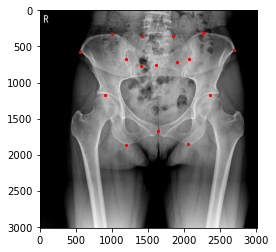

./aug/5a001349e4b0dca30d30524e_1.jpg
(2440, 2852)


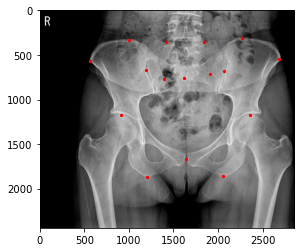

./aug/5a001349e4b0dca30d30524e_2.jpg
(2440, 2736)


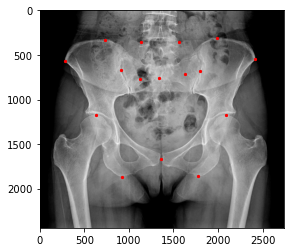

./aug/5a001349e4b0dca30d30524e_3.jpg
(2861, 2852)


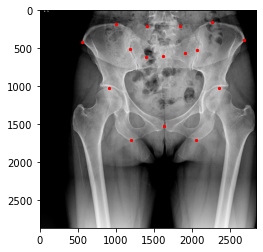

./aug/5a001349e4b0dca30d30524e_4.jpg
(2861, 2736)


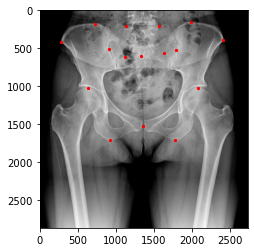

./aug/5a001349e4b0dca30d30524e_5.jpg
(2286, 2572)


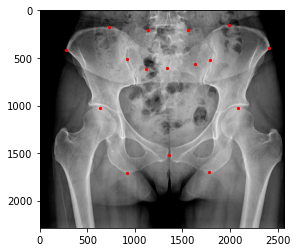

In [32]:
for idx in range(6):
    img_path = './aug/' + dff.loc[idx][0]
    print(img_path)

    landmarks = dff.loc[idx][1:].tolist()

    img = cv2.imread(img_path, 0)
    print(img.shape)

    plt.imshow(img, cmap='gray')
    for i in range(0, len(landmarks), 2):
        plt.scatter(landmarks[i], landmarks[i+1], c='r', s=5)
    plt.show()